In [1]:
from methods.subgradient import SubgradientDescent, Step
from methods.helpers import random_matrix, random_vector, proj_pos_orthant
import random
import numpy as np
import matplotlib.pyplot as plt


def f_i(x, Y_i, c_i, A_i, B_i):
    """
    Equation 1.2 of https://www.mit.edu/~dimitrib/Incr_2001.pdf
    """
    # print(np.shape(x))
    # print(np.shape(c_i))
    # print(np.shape(A_i))
    # print(np.shape(B_i))
    # print(np.shape(Y_i[0]))

    curr_best = -np.inf
    minimizer = Y_i[0]
    for y_i in Y_i:
        objective = np.dot((c_i + np.matmul(np.transpose(A_i), x)), y_i) - np.dot(B_i, x)
        curr_best = max(curr_best, objective)
        minimizer = y_i
    return (float(curr_best), minimizer)

def g_i(A_i, y_i):
    return np.matmul(A_i, y_i)

In [7]:
MAX_Y_SIZE = 10
M = 5 # Example for m = 5
n = 3
p = 2

c_1 = random_vector(p)
c_2 = random_vector(p)
c_3 = random_vector(p)
c_4 = random_vector(p)
c_5 = random_vector(p)

A_1 = random_matrix(n, p)
A_2 = random_matrix(n, p)
A_3 = random_matrix(n, p)
A_4 = random_matrix(n, p)
A_5 = random_matrix(n, p)

b = random_vector(n)
B = b / M

Y_1 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]
Y_2 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]
Y_3 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]
Y_4 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]
Y_5 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]

def f(x):
    objective1, _ = f_i(x, Y_1, c_1, A_1, B)
    objective2, _ = f_i(x, Y_2, c_2, A_2, B)
    objective3, _ = f_i(x, Y_3, c_3, A_3, B)
    objective4, _ = f_i(x, Y_4, c_4, A_4, B)
    objective5, _ = f_i(x, Y_5, c_5, A_5, B)
    return objective1+objective2+objective3+objective4+objective5


print(Y_1, "\n", Y_2,"\n", Y_3,"\n", Y_4,"\n", Y_5)
# f_i((0, 0, 0), Y_1, c_1, A_1, B)


[array([ 0.37923864, -0.26107182]), array([0.92950413, 0.05828156]), array([-0.24351893, -0.15626478]), array([-0.6083193 , -0.09992473]), array([ 0.05474435, -0.76195753]), array([0.22241993, 0.29881143]), array([ 0.20683566, -0.47779608]), array([-0.53816208, -0.12517372]), array([ 0.91867241, -0.06439018]), array([ 0.84584518, -0.54644576])] 
 [array([-0.55515803,  0.78442353]), array([ 0.11778548, -0.47347178])] 
 [array([-0.01278646,  0.38994012]), array([-0.43888557,  0.49599372]), array([ 0.0786624, -0.1758368]), array([-0.48171813, -0.20965796]), array([-0.30876175, -0.25596157])] 
 [array([0.3382583, 0.5992382]), array([0.43506903, 0.2260935 ]), array([-0.32746966,  0.40988345]), array([ 0.03240039, -0.57550051])] 
 [array([0.25090845, 0.02833978]), array([-0.23680465,  0.20003086]), array([0.24147057, 0.56942964]), array([-0.05140059,  0.06920733]), array([-0.2006797 ,  0.46248169]), array([ 0.09596566, -0.05224009]), array([ 0.05982705, -0.60169473]), array([-0.34352125, -0.

2.317858901367165 100


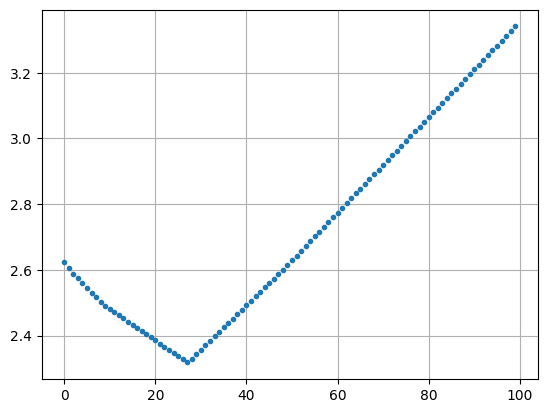

In [15]:
MAX_ITERATIONS = 100

# Original Subgradient Method
step_size = 0.1
curr_x = np.ones(n)
prev_x = np.zeros(n)
curr_best = np.inf
epsilon = 10**(-6)
iterations = 0
objectives = []

for i in range(MAX_ITERATIONS):
    iterations += 1
    prev_x = curr_x
    curr_f = f(curr_x)
    objectives.append(curr_f)
    curr_best = min(curr_best, curr_f)
    _, ymin_1 = f_i(curr_x, Y_1, c_1, A_1, B)
    _, ymin_2 = f_i(curr_x, Y_2, c_2, A_2, B)
    _, ymin_3 = f_i(curr_x, Y_3, c_3, A_3, B)
    _, ymin_4 = f_i(curr_x, Y_4, c_4, A_4, B)
    _, ymin_5 = f_i(curr_x, Y_5, c_5, A_5, B)
    g_1 = g_i(A_1, ymin_1)
    g_2 = g_i(A_2, ymin_2)
    g_3 = g_i(A_3, ymin_3)
    g_4 = g_i(A_4, ymin_4)
    g_5 = g_i(A_5, ymin_5)

    curr_x = proj_pos_orthant(curr_x-step_size*(g_1+g_2+g_3+g_4+g_5))
    # print(curr_x)

print(curr_best, iterations)
x = range(iterations)
y = objectives


plt.figure()
plt.plot(x, y, linewidth = 0.1, marker='.')
plt.grid()
plt.savefig("hello.png")